<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-loading-data" data-toc-modified-id="1.-loading-data-1">1. loading data</a></span></li><li><span><a href="#2.-basic-information" data-toc-modified-id="2.-basic-information-2">2. basic information</a></span><ul class="toc-item"><li><span><a href="#2.1-data-shape" data-toc-modified-id="2.1-data-shape-2.1">2.1 data shape</a></span></li><li><span><a href="#2.2-first-5-rows" data-toc-modified-id="2.2-first-5-rows-2.2">2.2 first 5 rows</a></span></li><li><span><a href="#2.3-data-information" data-toc-modified-id="2.3-data-information-2.3">2.3 data information</a></span></li><li><span><a href="#2.4-missing-values" data-toc-modified-id="2.4-missing-values-2.4">2.4 missing values</a></span></li><li><span><a href="#2.5-define-features-types" data-toc-modified-id="2.5-define-features-types-2.5">2.5 define features types</a></span></li></ul></li><li><span><a href="#3.-explore-numeric-columns" data-toc-modified-id="3.-explore-numeric-columns-3">3. explore numeric columns</a></span><ul class="toc-item"><li><span><a href="#3.1-data-distribution-table" data-toc-modified-id="3.1-data-distribution-table-3.1">3.1 data distribution table</a></span></li><li><span><a href="#3.2-histogram" data-toc-modified-id="3.2-histogram-3.2">3.2 histogram</a></span></li><li><span><a href="#3.3-correlations" data-toc-modified-id="3.3-correlations-3.3">3.3 correlations</a></span></li></ul></li><li><span><a href="#4.-explore-categorical-columns" data-toc-modified-id="4.-explore-categorical-columns-4">4. explore categorical columns</a></span></li></ul></div>

In [1]:
import pandas as pd 
import missingno as msno
import matplotlib.pyplot as plt

D:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. loading data

In [2]:
train_df = pd.read_csv('./used_car_train_20200313.csv', sep=' ') 
test_df = pd.read_csv('./used_car_testA_20200313.csv', sep=' ')

## 2. basic information

### 2.1 data shape

In [3]:
print(train_df.shape)

(150000, 31)


### 2.2 first 5 rows

In [4]:
print(train_df.head())

   SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  power  \
0       0     736  20040402   30.0      6       1.0       0.0      0.0     60   
1       1    2262  20030301   40.0      1       2.0       0.0      0.0      0   
2       2   14874  20040403  115.0     15       1.0       0.0      0.0    163   
3       3   71865  19960908  109.0     10       0.0       0.0      1.0    193   
4       4  111080  20120103  110.0      5       1.0       0.0      0.0     68   

   kilometer  ...       v_5       v_6       v_7       v_8       v_9      v_10  \
0       12.5  ...  0.235676  0.101988  0.129549  0.022816  0.097462 -2.881803   
1       15.0  ...  0.264777  0.121004  0.135731  0.026597  0.020582 -4.900482   
2       12.5  ...  0.251410  0.114912  0.165147  0.062173  0.027075 -4.846749   
3       15.0  ...  0.274293  0.110300  0.121964  0.033395  0.000000 -4.509599   
4        5.0  ...  0.228036  0.073205  0.091880  0.078819  0.121534 -1.896240   

       v_11      v_12     

### 2.3 data information

In [5]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

### 2.4 missing values

<AxesSubplot:>

<Figure size 432x432 with 0 Axes>

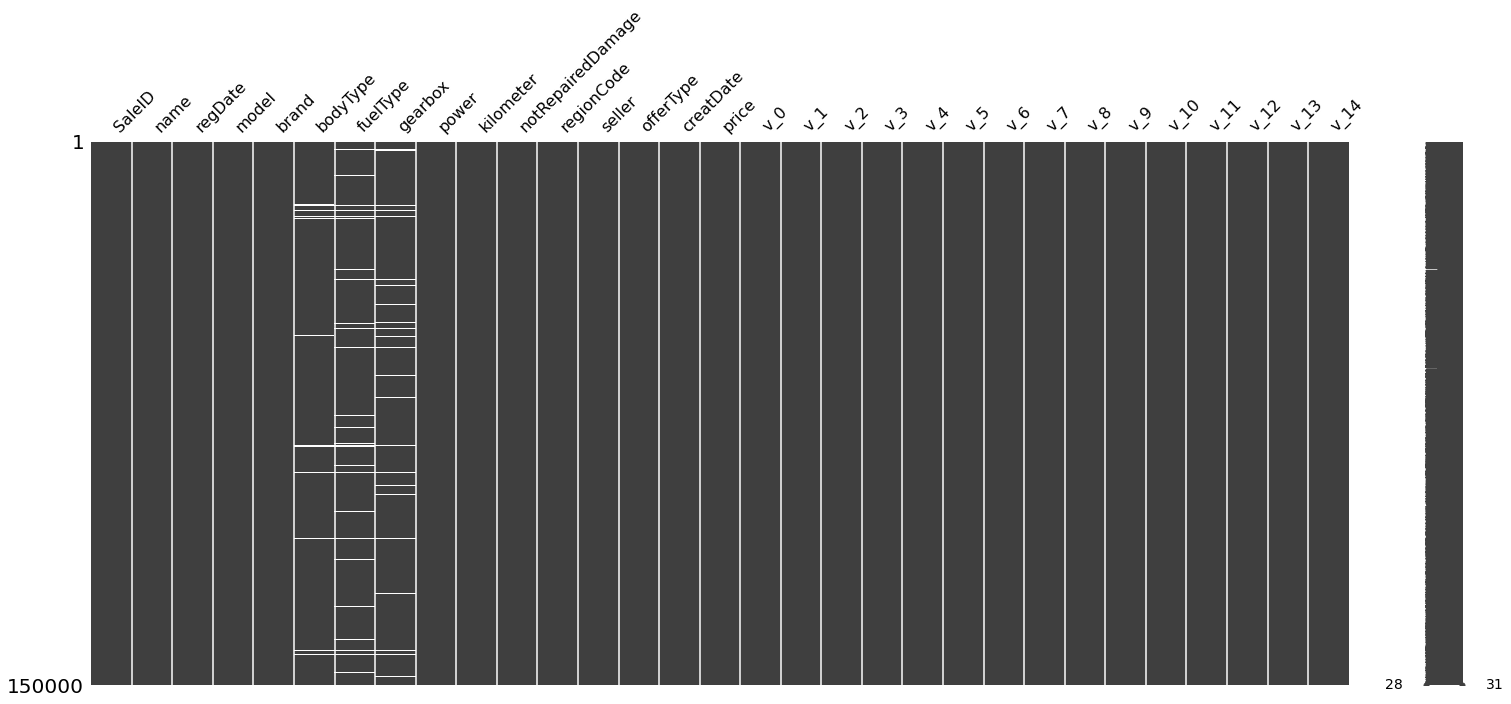

In [6]:
plt.figure(figsize=(6, 6))
sample = train_df.sample(1000)
msno.matrix(train_df)

### 2.5 define features types

In [7]:
date_columns = ['creatDate', 'regDate']
useless_columns = ['SaleID', 'name', 'model', 'regionCode',]
label_columns = ['price']

categorical_columns = ['brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'seller', 'offerType']
numeric_columns = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 
                   'v_10', 'v_11', 'v_12','v_13', 'v_14']

## 3. explore numeric columns

### 3.1 data distribution table

In [8]:
train_df[numeric_columns].describe()

,power,kilometer,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,119.316547,12.597160,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,177.168419,3.919576,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.500000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,75.000000,12.500000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,110.000000,15.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,150.000000,15.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,19312.000000,15.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


### 3.2 histogram

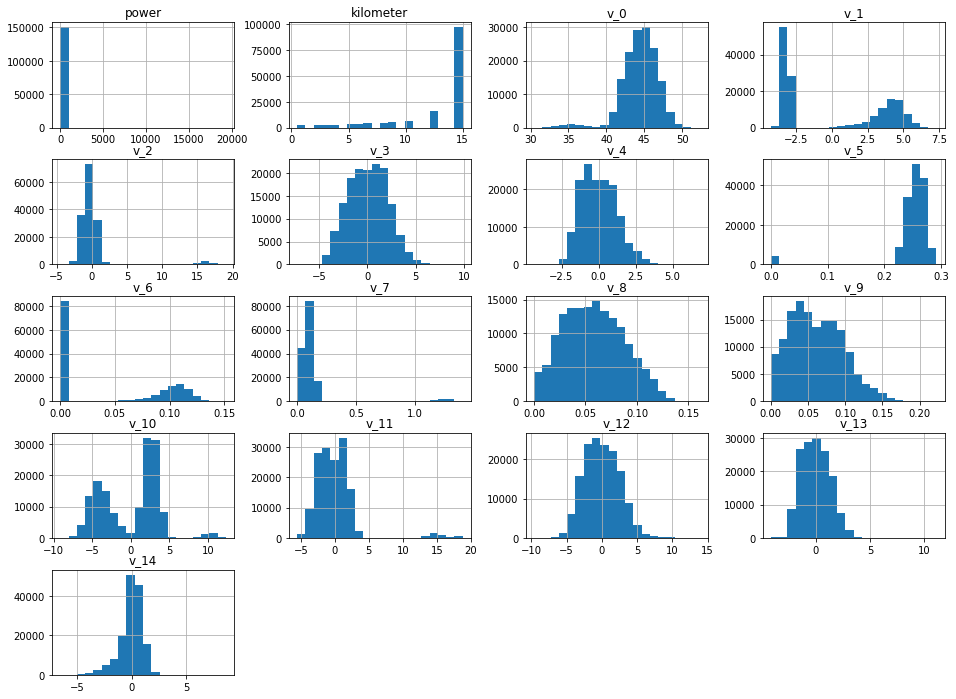

In [9]:
train_df[numeric_columns].hist(bins=20, figsize=(16, 12))
plt.show()

### 3.3 correlations

D:\Anaconda3\lib\site-packages\seaborn\matrix.py:287: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
D:\Anaconda3\lib\site-packages\seaborn\matrix.py:287: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

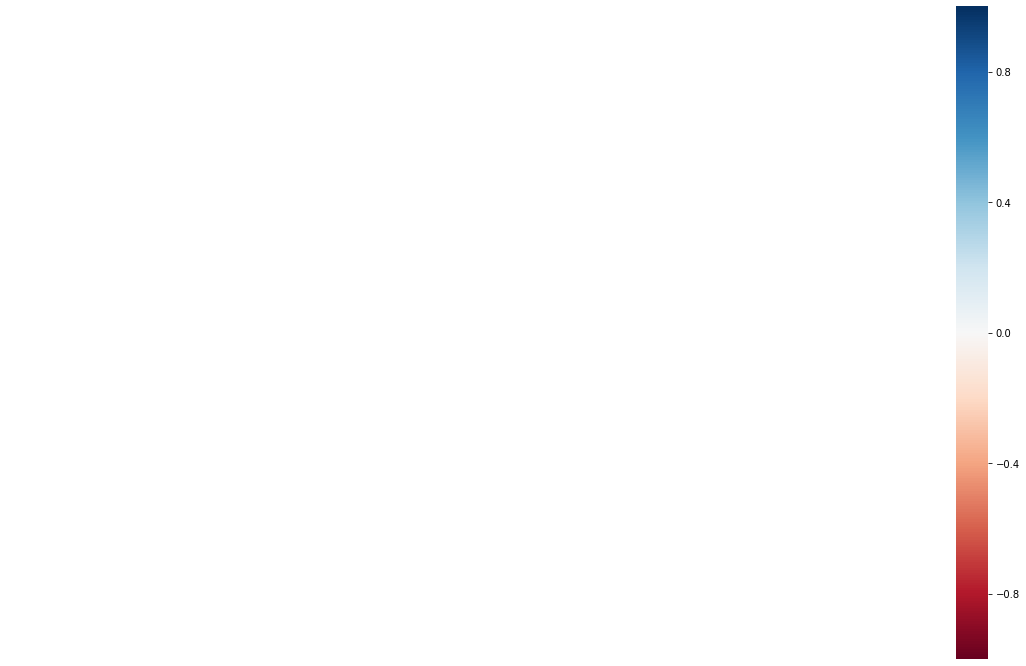

In [10]:
msno.heatmap(train_df[numeric_columns].sample(10000)) # 这里我不知道问题出在哪里

In [11]:
train_df[numeric_columns]

,power,kilometer,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,60,12.5,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,0,15.0,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,163,12.5,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,193,15.0,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,68,5.0,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,163,15.0,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,125,10.0,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,90,6.0,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,156,15.0,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


## 4. explore categorical columns

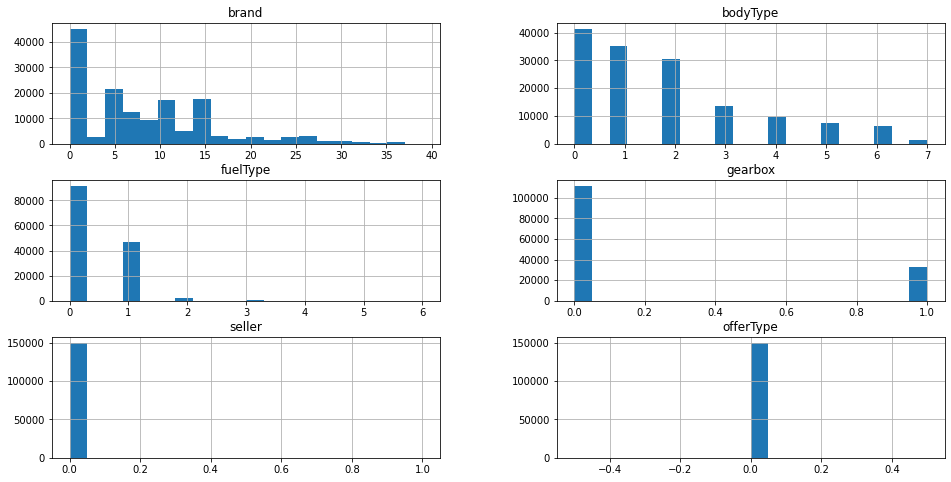

In [12]:
train_df[categorical_columns].hist(bins=20, figsize=(16, 8))
plt.show()